In [150]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import os
import math
import pandas
import scipy


In [157]:
'''reading the data from the file and getting the values of X and Y'''
os.chdir('/Users/sreelakshmirajendrakumar/Downloads')
datasetLasso = pandas.read_csv('project3_F2019_lasso.csv')
XLasso=datasetLasso.iloc[:,0:251]
XLasso=XLasso.to_numpy()
#appending the missing row from the dataset
firstValues=list(datasetLasso.columns.values)
for i in range(0,251):
    firstValues[i]=float(firstValues[i])
valuesToAppend=np.zeros((251,1))
firstValues=np.array(firstValues)
for i in range(0,251):
    valuesToAppend[i]=firstValues[i]
XLasso=np.concatenate((valuesToAppend.T,XLasso),axis=0) # is 200 the number of samples?

X=XLasso[:,0:-1] # shape(250,200)
Y=XLasso[:,-1] # shape(200,)
X=np.reshape(X,(200,250))
Y=np.reshape(Y,(200,1))



In [158]:
np.shape(X)

(200, 250)

In [159]:
def attach(attachX): # input: centralized X
    '''attaching ones to the first column'''
    (N,d)=np.shape(attachX)
    tempX=np.ones((N,1))
    attachedX=np.concatenate((tempX,attachX),axis=1)
    return attachedX

theLambda=np.arange(1,301,1)
theLambda=np.square(theLambda)

(N,d)=np.shape(X)
X=attach(X)

In [160]:
np.shape(X)

(200, 251)

In [199]:
def proximalLasso(Beta,Alpha,Lambda,X=X,Y=Y,d=d):
    '''one iteration of proximal gradient descent algorithm for lasso'''    
    temp=np.matmul(X.T,Y)
    temp2=np.matmul(X.T,X)
    temp3=np.matmul(temp2,Beta)
    temp4=Alpha*2
    temp5=np.subtract(temp,temp3)
    U=np.multiply(temp5,temp4)
    
    temp6=np.add(Beta,U) # matrix
    
    tempBeta=[] # gives the value of beta on the next iteration
        
    for j in range(0,d+1):
        if temp6[j]>Alpha*Lambda:
            temp7=temp6[j]+(Alpha*Lambda)
            tempBeta.append(temp7[0])
        elif temp6[j]<=abs(Alpha*Lambda):
            tempBeta.append(0)
        elif temp6[j]<-Alpha*Lambda:
            temp8=temp6[j]-(Alpha*Lambda)
            tempBeta.append(temp8[0])
            
    return np.reshape(tempBeta,(d+1,1))

hh=proximalLasso(np.random.rand(d+1,1),1/900,900)

In [200]:
np.shape(hh)

(251, 1)

In [242]:
def proximalLassoIter(Alpha,Lambda,XIter=X,YIter=Y,dIter=d):
    '''multiple iterations of proximal gradient descent algorithm for lasso'''
    theBeta=[]   
    initialBeta=np.random.rand(dIter+1,1)
    theBeta.append(initialBeta)
    t=1
    flag=0
    for i in range(0,100):
        newBeta=proximalLasso(theBeta[t-1],Alpha,Lambda,XIter,YIter)
        toAppend=np.reshape(np.array(newBeta),(d+1,1))
        theBeta.append(toAppend)
#     while True:
#         w=t
#         newBeta=proximalLasso(theBeta[t-1],Alpha,Lambda,XIter,YIter)
#         toAppend=np.reshape(np.array(newBeta),(d+1,1))
#         theBeta.append(toAppend) 
        
# #         error=np.abs(np.subtract(theBeta[i],theBeta[i-1]))
# #         i+=1
            
# #         for j in range(0,len(error)):
# #             if error[j]<=10**-1:
# #                 w+=1
# #         if w==len(error):
# #             break
#         t+=1
#         if t==100:
#             break
#     return(theBeta[-1])
    return theBeta[-1]
gg=proximalLassoIter(0.03,900)

In [243]:
np.shape(gg)

(251, 1)

In [244]:
def truncateBeta(truncBeta): # pass the value of beta obtained on last the iteration
    '''truncating small values in beta'''
    for i in range(len(truncBeta)):
        if abs(truncBeta[i])<10**(-5):
            truncBeta[i]=0
    return truncBeta  


In [245]:
def separate(Beta):
    BetaZero=Beta[0]
    B=Beta[1:-1]
    
    return BetaZero,B 


In [246]:
lambdaBeta=[]
lambdaBetaZero=[]
lambdaB=[]
for index,value in enumerate(theLambda):
    alpha=.03
    temp=proximalLassoIter(alpha,value)
    lambdaBeta.append(temp) #use the last iterated value by the function
    
    '''separating beta and b'''
    temp1,temp2=separate(lambdaBeta[index])
    lambdaBetaZero.append(temp1)
    lambdaB.append(temp2)

In [248]:
np.shape(lambdaB)

(300, 249, 1)

In [249]:
'''plots for the question'''    
def nonVanishingCoeff(recoverLambdaB=lambdaB): # apply this to all arrys in lambdaB and store in a matrix
    toPlot=[]
    for k in range(0,len(recoverLambdaB)):
        w=0
        for j in range(0,len(recoverLambdaB[0])):
            if recoverLambdaB[k][j]!=0:
                w+=1
        toPlot.append(w)    
    return toPlot
    
def plotB(jValue,LambdaB=lambdaB): # plotLambdaB is lambdaB and j is 21,36, and 200
    toBePlotted=[]
    for k in range(0,len(LambdaB)):
        toBePlotted.append(LambdaB[k][jValue]) # plot against lambda
        
    return toBePlotted

def increment(j,LambdaB=lambdaB,TheLambda=theLambda): 
    toPlot=[]
    for k in range(0,len(LambdaB)-1):
        temp=LambdaB[k+1][j]-LambdaB[k][j]
        temp1=theLambda[k+1]-theLambda[k]
        temp3=temp/temp1
        toPlot.append(temp3) # note that this is one element leaa than that of theLambda
    return toPlot

Text(0.5, 1.0, 'Plotting non vanishing coefficients in b corresponding to the lambda values')

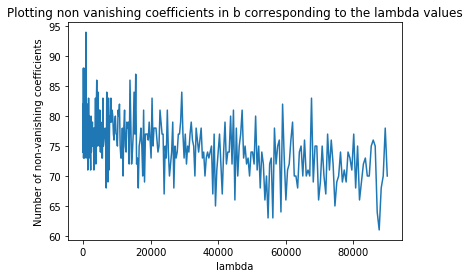

In [250]:
'''Plotting'''
w=nonVanishingCoeff()
plt.plot(theLambda,w)
plt.xlabel('lambda')
plt.ylabel('Number of non-vanishing coefficients')
plt.title('Plotting non vanishing coefficients in b corresponding to the lambda values')




In [251]:
"""plot of b(j) correspomding to each lambda"""
j21=plotB(21)
plt.plot(theLambda,j21)
plt.xlabel('lambda')
plt.ylabel('Value of b(j) when j=21')
plt.title('Plotting the value of b(j) corresponding to the lambda values when j=21')



Text(0.5, 1.0, 'Plotting the value of b(j) corresponding to the lambda values when j=21')

Text(0.5, 1.0, 'Plotting the value of b(j) corresponding to the lambda values when j=36')

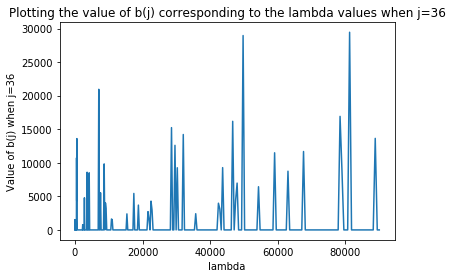

In [252]:
j36=plotB(36)
plt.plot(theLambda,j36)
plt.xlabel('lambda')
plt.ylabel('Value of b(j) when j=36')
plt.title('Plotting the value of b(j) corresponding to the lambda values when j=36')


Text(0.5, 1.0, 'Plotting the value of b(j) corresponding to the lambda values when j=200')

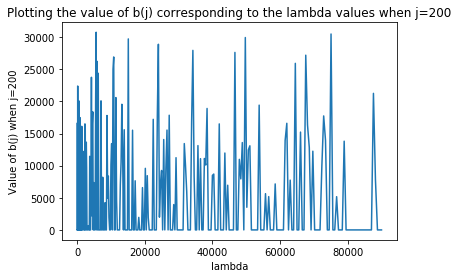

In [253]:
j200=plotB(200)
plt.plot(theLambda,j200)
plt.xlabel('lambda')
plt.ylabel('Value of b(j) when j=200')
plt.title('Plotting the value of b(j) corresponding to the lambda values when j=200')


In [254]:

'''plot of increment corresponding to each lambda'''
J21=increment(21)
plt.plot(theLambda[1:],J21)
plt.xlabel('lambda')
plt.ylabel('Value of increment when j=21')
plt.title('Plotting the value of increment corresponding to the lambda values when j=21')



Text(0.5, 1.0, 'Plotting the value of increment corresponding to the lambda values when j=21')

In [256]:
J36=increment(36)
plt.plot(theLambda[1:],J36)
plt.xlabel('lambda')
plt.ylabel('Value of b(j) when j=36')
plt.title('Plotting the value of increment corresponding to the lambda values when j=36')



Text(0.5, 1.0, 'Plotting the value of increment corresponding to the lambda values when j=36')

Text(0.5, 1.0, 'Plotting the value of increment corresponding to the lambda values when j=200')

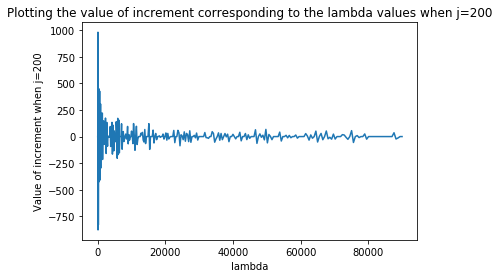

In [258]:
J200=increment(200)
plt.plot(theLambda[1:],J200)
plt.xlabel('lambda')
plt.ylabel('Value of increment when j=200')
plt.title('Plotting the value of increment corresponding to the lambda values when j=200')
